In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## 1. Exploration du dataset

### 1. variables numériques

In [3]:
data = pd.read_csv("/home/onyxia/ML_project/heart_disease_uci.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [37]:
data.shape, data.dropna().shape

((920, 16), (299, 16))

(<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>)

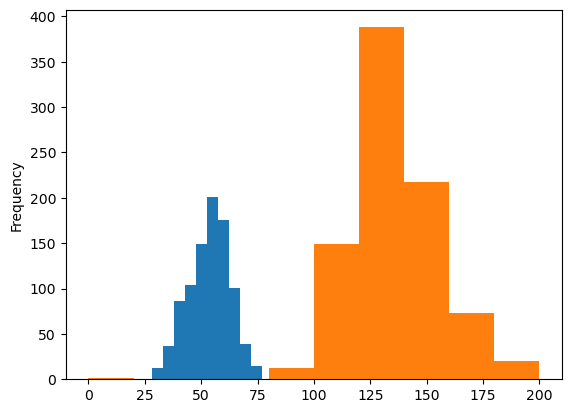

In [15]:
data.age.plot.hist(), data.trestbps.plot.hist()


<Axes: ylabel='Frequency'>

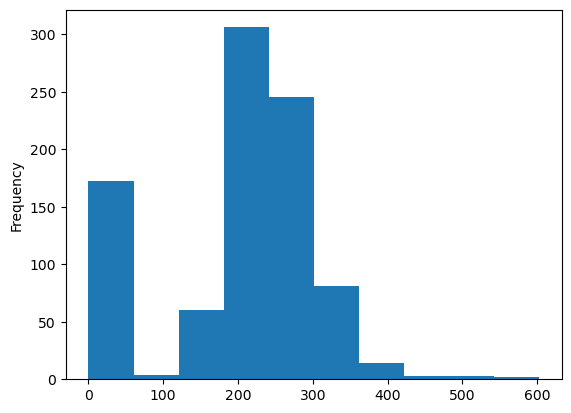

In [18]:
data.chol.plot.hist()

<Axes: ylabel='Frequency'>

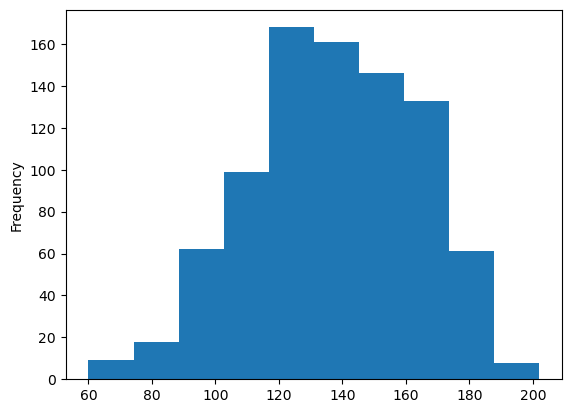

In [19]:
data.thalch.plot.hist()

### 2. variables catégorielles

<Axes: ylabel='count'>

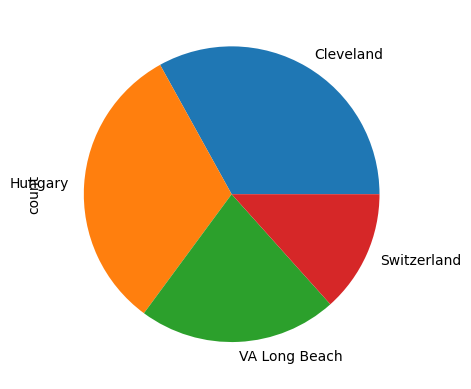

In [49]:
data.dataset.value_counts().plot.pie()

<Axes: xlabel='fbs'>

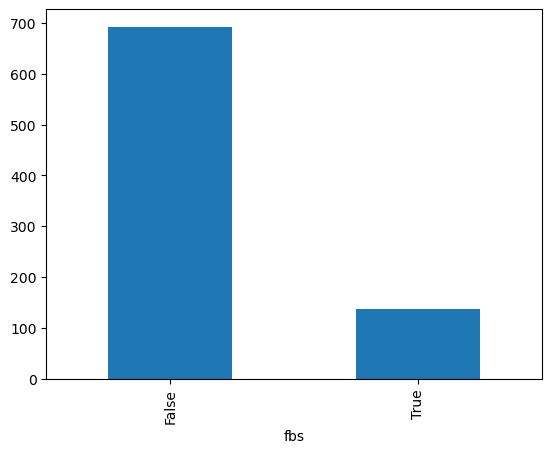

In [51]:
data.fbs.value_counts().plot.bar()

## 2. Gestion des valeurs manquantes

In [35]:
# pourcentage de valeurs manquantes par colonne

data.isna().mean()*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [86]:
data = data.replace({True:1, False:0})

/tmp/ipykernel_3695/3139730978.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True:1, False:0})


In [87]:
features = data.drop(['id','num'], axis=1)
features

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,Cleveland,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect
1,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal
2,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect
3,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal
4,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,1.0,st-t abnormality,154.0,0.0,0.0,NaN,NaN,NaN
916,62,Male,VA Long Beach,typical angina,NaN,139.0,0.0,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,1.0,st-t abnormality,100.0,0.0,0.0,NaN,NaN,fixed defect
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,1.0,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
target = data.num
target[target.isin([2,3,4])] = 1
target.unique()

/tmp/ipykernel_3695/2124794842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[target.isin([2,3,4])] = 1


array([0, 1])

On a bien features et target. Maintenant on divise en deux datasets, un train, un test.

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [90]:
num_features = ['age','trestbps','chol','thalch', 'oldpeak', 'ca', 'fbs', 'exang']
cat_features = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal'] 


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline pour les caractéristiques numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation par la médiane
    ('scaler', StandardScaler())                    # Normalisation
])

# Pipeline pour les caractéristiques catégorielles
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation par le mode
    ('encoder', OneHotEncoder())                            # One-hot encoding
])


# Préprocesseur combinant les deux pipelines

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Pipeline complet pour le preprocessing et la formation du modèle
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())  # Remplacez par votre modèle de ML
])

# Formation du modèle
full_pipeline.fit(X_train, y_train)
# Prédiction
y_pred = full_pipeline.predict(X_test)

In [103]:
# Calculer l'accuracy

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8478260869565217


In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8671875
Recall: 0.8283582089552238
F1 Score: 0.8473282442748091


### Cross validation en trois lignes 

In [113]:
from sklearn.model_selection import cross_val_score

# Configuration de la cross-validation
scores = cross_val_score(full_pipeline, features, target, cv=5, scoring='f1')

# Affichage des scores
print("Scores de chaque fold :", scores)
print("Moyenne des scores :", scores.mean())
print("Écart-type des scores :", scores.std())

Scores de chaque fold : [0.84042553 0.68156425 0.92783505 0.85436893 0.75276753]
Moyenne des scores : 0.8113922577970906
Écart-type des scores : 0.08548803592244233


### On garde le modèle SVM.

#### Courbe d'apprentissage / trade off biais variance.

/opt/mamba/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/mamba/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
   

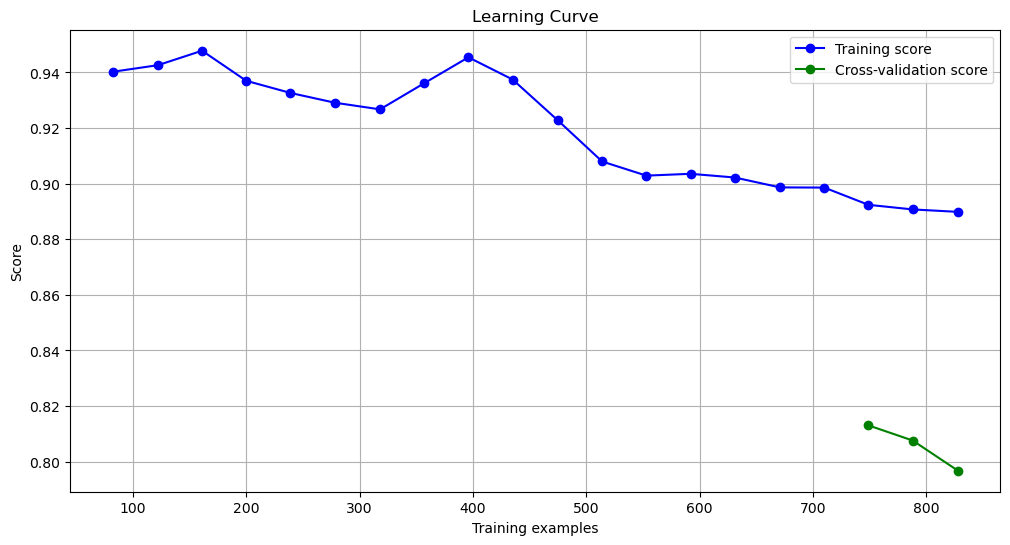

In [118]:
from sklearn.model_selection import learning_curve

X = features  # Vos données de caractéristiques
y = target    # Vos données de cible

from sklearn.model_selection import StratifiedKFold


train_sizes, train_scores, test_scores = learning_curve(
    estimator=full_pipeline,  # Votre pipeline complet
    X=X,  # Données de caractéristiques
    y=y,  # Données cible
    train_sizes=np.linspace(0.1, 1.0, 20),  # 10 tailles d'ensemble d'entraînement proportionnelles
    cv=StratifiedKFold(n_splits=10),  # Nombre de plis pour la validation croisée
    scoring='accuracy',  # Métrique d'évaluation, ici 'accuracy'
    n_jobs=-1  # Utiliser tous les processeurs disponibles
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)




plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


#### On teste la régularisation Lasso et Ridge

#### Fine Tuning avec Grid Search

#### Bagging et boosting 